In [1]:
import os
import sys
import json
import pickle
import requests
import pandas as pd
from pathlib import Path
from matplotlib import pyplot as plt

from bdp.data.crypto.coingecko.downloads import (
    get_all_coins_and_contracts_data,
    get_coin_data,
    get_df_timeserieses,
    download_all_uniswap_coins_metadata,
    metadataLists
)

from bdp.data.crypto.coingecko.utils import (
    get_current_and_past_timestamps,
)

from bdp.data.crypto.coingecko.coingecko_dataclasses import (
    PriceChangeData,
    prepare_dict_for_dataclasss,
    filter_dict_for_dataclass
)

from bdp.data.crypto.coingecko.metadata_postprocessing import price_change_data_to_dataframe
from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
get_current_and_past_timestamps()

(1710405285.036832, 1702629285.036832)

In [5]:
date_string = "2024-03-13"
metadata_lists:metadataLists = metadataLists(date_string=date_string)
metadata_lists.num_uniswap_ids_ready

1095

In [49]:
#metadataLists.not_uniswap[0]

In [48]:
#[coin for coin in metadata_lists.not_uniswap if coin.id == "binancecoin"]

In [3]:
uniswap_metadata_df = price_change_data_to_dataframe(metadata_lists.uniswap_coins)

In [6]:
#uniswap_metadata_df.columns

In [4]:
uniswap_metadata_df.describe()

,sentiment_votes_up_percentage,watchlist_portfolio_users,market_cap_rank,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,...,price_change_percentage_7d_in_currency,price_change_percentage_14d_in_currency,price_change_percentage_30d_in_currency,price_change_percentage_60d_in_currency,price_change_percentage_200d_in_currency,price_change_percentage_1y_in_currency,current_price,total_value_locked,mcap_to_tvl_ratio,market_cap
count,528.000000,821.000000,601.000000,767.000000,821.000000,821.000000,8.210000e+02,821.000000,821.000000,8.210000e+02,...,811.000000,797.000000,7.740000e+02,745.000000,626.000000,5.240000e+02,8.210000e+02,1.030000e+02,92.000000,8.200000e+02
mean,83.420322,22555.041413,861.607321,2.106478,19.781423,37.262655,1.324167e+08,91.685841,325.500600,5.320236e+03,...,20.025337,38.384742,1.404575e+08,101.039028,426.894557,8.335713e+03,4.034090e+02,1.129076e+09,3073.263913,3.956404e+08
std,22.453228,47973.364001,943.090022,18.202021,54.253670,73.090228,3.794146e+09,225.455061,1877.377878,1.458158e+05,...,54.542729,73.892672,3.907645e+09,234.682739,2140.292689,1.825142e+05,4.176458e+03,4.394785e+09,19865.826616,1.928736e+09
min,0.000000,7.000000,6.000000,-78.197240,-92.603900,-88.104840,-9.038387e+01,-98.794500,-99.999940,-9.999993e+01,...,-92.603900,-88.104840,-9.038387e+01,-98.794500,-99.999940,-9.999993e+01,7.612500e-14,0.000000e+00,0.020000,0.000000e+00
25%,77.780000,850.000000,243.000000,-2.356375,-0.956350,0.112370,9.785110e+00,0.271110,0.000000,0.000000e+00,...,-1.109745,1.967210,1.936988e+01,10.332440,43.508218,1.037948e+00,3.500150e-03,5.450620e+05,0.622500,0.000000e+00
50%,90.000000,6973.000000,497.000000,0.275490,8.480140,20.588680,5.381798e+01,47.251490,88.514920,0.000000e+00,...,8.755660,21.342990,5.779694e+01,54.513480,141.324550,6.438891e+01,1.246750e-01,3.184006e+07,2.175000,5.978405e+07
75%,100.000000,25145.000000,1064.000000,4.894865,25.405270,45.061890,1.008153e+02,105.001490,233.144560,1.108645e+02,...,25.724945,46.315610,1.059498e+02,118.101900,313.923345,1.899493e+02,1.400000e+00,2.747034e+08,17.095000,2.106201e+08
max,100.000000,656826.000000,4011.000000,315.007710,574.936360,906.985270,1.087140e+11,3262.940440,46691.248420,4.178016e+06,...,574.936360,906.985270,1.087140e+11,3262.940440,46691.248420,4.178016e+06,7.304100e+04,4.021800e+10,176786.070000,3.991446e+10


In [9]:
uniswap_metadata_df.sort_values(by="market_cap",ascending=False).head()


,sentiment_votes_up_percentage,watchlist_portfolio_users,market_cap_rank,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,...,price_change_percentage_60d_in_currency,price_change_percentage_200d_in_currency,price_change_percentage_1y_in_currency,current_price,total_value_locked,mcap_to_tvl_ratio,market_cap,uniswap,id,contract
77,81.82,16627,6.0,0.68326,5.62161,21.02659,63.24335,59.68944,145.35342,156.49136,...,59.68944,145.35342,156.49136,4047.280000,NaN,NaN,3.991446e+10,True,staked-ether,0xae7ab96520de3a18e5e111b5eaab095312d7fe84
78,82.00,656826,12.0,-0.72282,-11.71820,187.78150,249.77645,228.70907,294.83872,203.77761,...,228.70907,294.83872,203.77761,0.000032,NaN,NaN,1.910369e+10,True,shiba-inu,0x95ad61b0a150d79219dcf64e1e6cc01f0b64c4ce
141,80.79,64577,13.0,22.20866,67.12173,66.47140,107.39242,114.14333,211.39494,89.30637,...,114.14333,211.39494,89.30637,4.510000,NaN,NaN,1.558096e+10,True,the-open-network,0x582d872a1b094fc48f5de31d3b73f2d9be47def1
184,80.79,64578,13.0,22.41079,67.39816,66.74675,107.73545,114.49753,211.91000,89.61949,...,114.49753,211.91000,89.61949,4.520000,NaN,NaN,1.558096e+10,True,the-open-network,0x582d872a1b094fc48f5de31d3b73f2d9be47def1
79,86.67,604415,16.0,4.81680,17.16797,19.69655,52.00541,43.61002,127.74358,11.50262,...,43.61002,127.74358,11.50262,1.250000,5.241209e+09,2.21,1.157421e+10,True,matic-network,0x7d1afa7b718fb893db30a3abc0cfc608aacfebb0


In [94]:
uniswap_metadata_df.columns

Index(['sentiment_votes_up_percentage', 'watchlist_portfolio_users',
       'market_cap_rank', 'price_change_percentage_24h',
       'price_change_percentage_7d', 'price_change_percentage_14d',
       'price_change_percentage_30d', 'price_change_percentage_60d',
       'price_change_percentage_200d', 'price_change_percentage_1y',
       'price_change_percentage_1h_in_currency',
       'price_change_percentage_24h_in_currency',
       'price_change_percentage_7d_in_currency',
       'price_change_percentage_14d_in_currency',
       'price_change_percentage_30d_in_currency',
       'price_change_percentage_60d_in_currency',
       'price_change_percentage_200d_in_currency',
       'price_change_percentage_1y_in_currency', 'current_price',
       'total_value_locked', 'mcap_to_tvl_ratio', 'market_cap', 'uniswap',
       'id', 'contract'],
      dtype='object')

In [95]:
uniswap_metadata_df.sort_values(by="watchlist_portfolio_users",ascending=False).head()

,sentiment_votes_up_percentage,watchlist_portfolio_users,market_cap_rank,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,...,price_change_percentage_60d_in_currency,price_change_percentage_200d_in_currency,price_change_percentage_1y_in_currency,current_price,total_value_locked,mcap_to_tvl_ratio,market_cap,uniswap,id,contract
117,83.85,668636,4.0,12.26538,37.96603,42.15840,84.65981,96.34764,170.71049,94.63990,...,96.34764,170.71049,94.63990,587.220000,NaN,NaN,9.033092e+10,False,binancecoin,0xb8c77482e45f1f44de1745f52c74426c631bdd52
105,83.72,668635,4.0,12.24692,37.94335,42.13503,84.62945,96.31535,170.66598,94.60789,...,96.31535,170.66598,94.60789,587.120000,NaN,NaN,9.033092e+10,False,binancecoin,0xb8c77482e45f1f44de1745f52c74426c631bdd52
92,84.48,453401,15.0,0.99942,5.78866,6.61760,1.69142,46.99699,244.37229,217.16075,...,46.99699,244.37229,217.16075,20.720000,NaN,NaN,1.219810e+10,False,chainlink,0x514910771af9ca656af840dff83e8264ecf986ca
90,73.33,328419,3.0,-0.09168,-0.15918,-0.13360,-0.03068,-0.11415,-0.02171,-0.64463,...,-0.11415,-0.02171,-0.64463,0.999298,NaN,NaN,1.026646e+11,False,tether,0xdac17f958d2ee523a2206206994597c13d831ec7
118,94.55,275146,38.0,-3.30396,3.37549,51.05734,84.00009,79.63279,208.49447,131.51656,...,79.63279,208.49447,131.51656,0.157680,3690944.0,1138.19,4.200994e+09,False,crypto-com-chain,0xa0b73e1ff0b80914ab6fe0444e65848c4c34450b


In [86]:
price_change_percentage_7d = uniswap_metadata_df['price_change_percentage_7d'].values
price_change_percentage_14d = uniswap_metadata_df['price_change_percentage_14d'].values
print(len(price_change_percentage_14d))

821


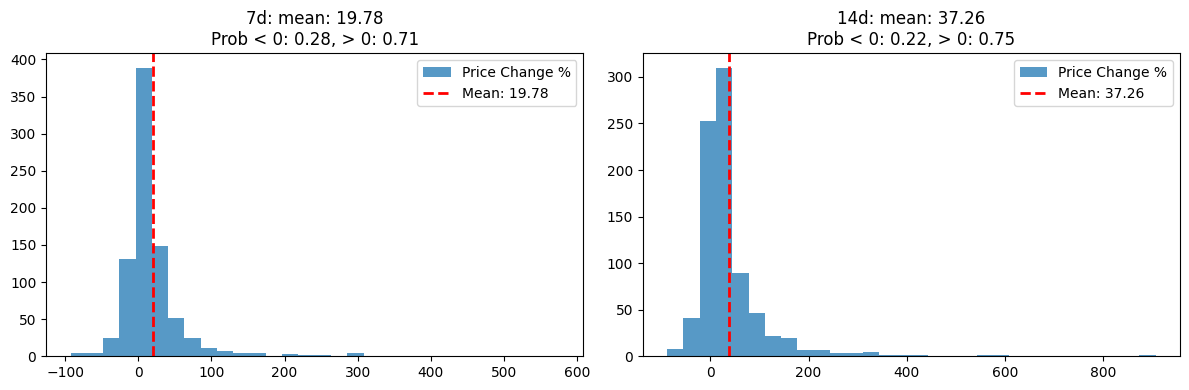

In [87]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(12, 4))

# 7-day price change histogram with mean line
mean_7d = price_change_percentage_7d.mean()
prob_below_zero_7d = (price_change_percentage_7d < 0).mean()
prob_above_zero_7d = (price_change_percentage_7d > 0).mean()
ax[0].hist(price_change_percentage_7d, bins=30, alpha=0.75, label='Price Change %')
ax[0].axvline(mean_7d, color='r', linestyle='dashed', linewidth=2, label=f'Mean: {round(mean_7d, 2)}')
ax[0].set_title(f"7d: mean: {round(mean_7d,2)}\nProb < 0: {prob_below_zero_7d:.2f}, > 0: {prob_above_zero_7d:.2f}")
ax[0].legend()

# 14-day price change histogram with mean line
mean_14d = price_change_percentage_14d.mean()
prob_below_zero_14d = (price_change_percentage_14d < 0).mean()
prob_above_zero_14d = (price_change_percentage_14d > 0).mean()
ax[1].hist(price_change_percentage_14d, bins=30, alpha=0.75, label='Price Change %')
ax[1].axvline(mean_14d, color='r', linestyle='dashed', linewidth=2, label=f'Mean: {round(mean_14d, 2)}')
ax[1].set_title(f"14d: mean: {round(mean_14d,2)}\nProb < 0: {prob_below_zero_14d:.2f}, > 0: {prob_above_zero_14d:.2f}")
ax[1].legend()

plt.tight_layout()
plt.show()